# Mini Project : Credit Risk

Giving credit is risky business. Banks and other financial institutions do their best to screen for all relevant details before granting credit. It is time to see if you can help them with that!

Expected Output

By the end of this mini-project, you will need to deliver within your code:

- Multiple accuracy measures resembling different k-neighbors used for training your k-nearest neighbor (KNN) classifier.
- One printed confusion matrix for the best model.

You are expected to write around 35 lines of code to complete this projec

# Download the Dataset

Download the Dataset

Method 1

- Download the dataset from the following link
(download the dataset to your local computer in the project directory of your choice):
https://www.openml.org/d/31

Method 2
- Use Scikit-Learn library to directly download the dataset into your Python notebook.
Check out how?

In [105]:
from sklearn.datasets import fetch_openml

credit_g = fetch_openml(name="credit-g", version=1, as_frame=True)

X = credit_g.data
y = credit_g.target

X.head(5)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes


# Reading the Dataset

Read the dataset into the Pandas DataFrame!

Does the dataset include any missing values? If so, drop them!

Hint: Pandas can do that with one line of code!

In [106]:
import pandas as pd

df = pd.concat([X,y], axis=1)

df.dropna() # no rows with missing values

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


# Feature Selection

Choose the features you think are relevant to our analysis! There are A LOT of features in this dataset, but we have to make our models training time reasonable for you.

You MUST include at least four numeric features and at least three nominal features. You can choose more if you prefer.

In [107]:
from sklearn.preprocessing import LabelEncoder

df["class"] = LabelEncoder().fit_transform(df["class"])

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0


<Axes: >

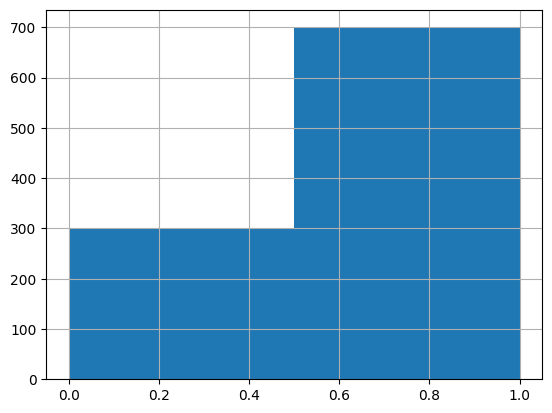

In [108]:
import matplotlib.pyplot as plt

df["class"].hist(bins=2)

<Axes: >

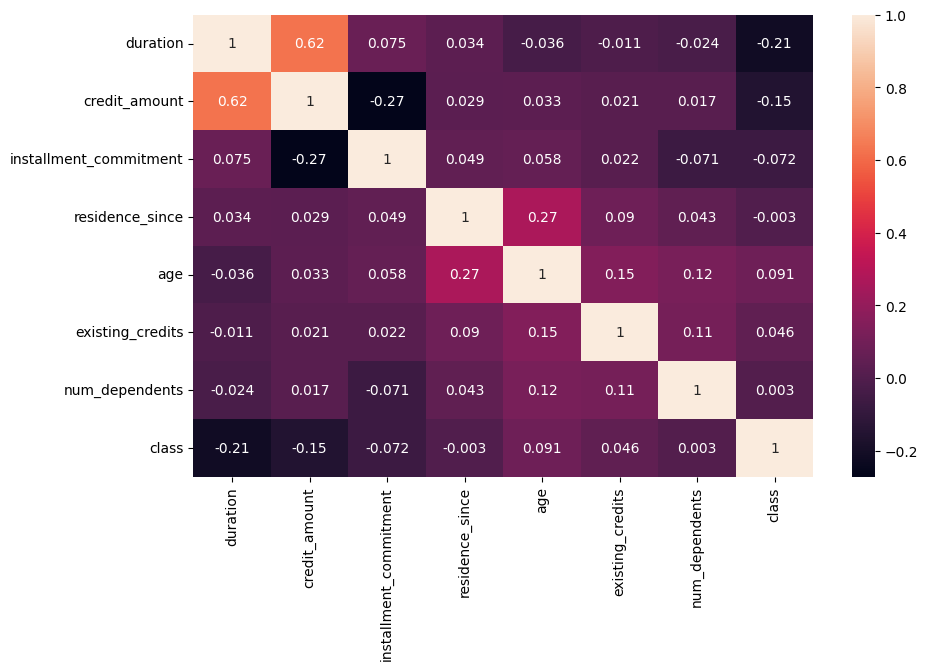

In [109]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True)

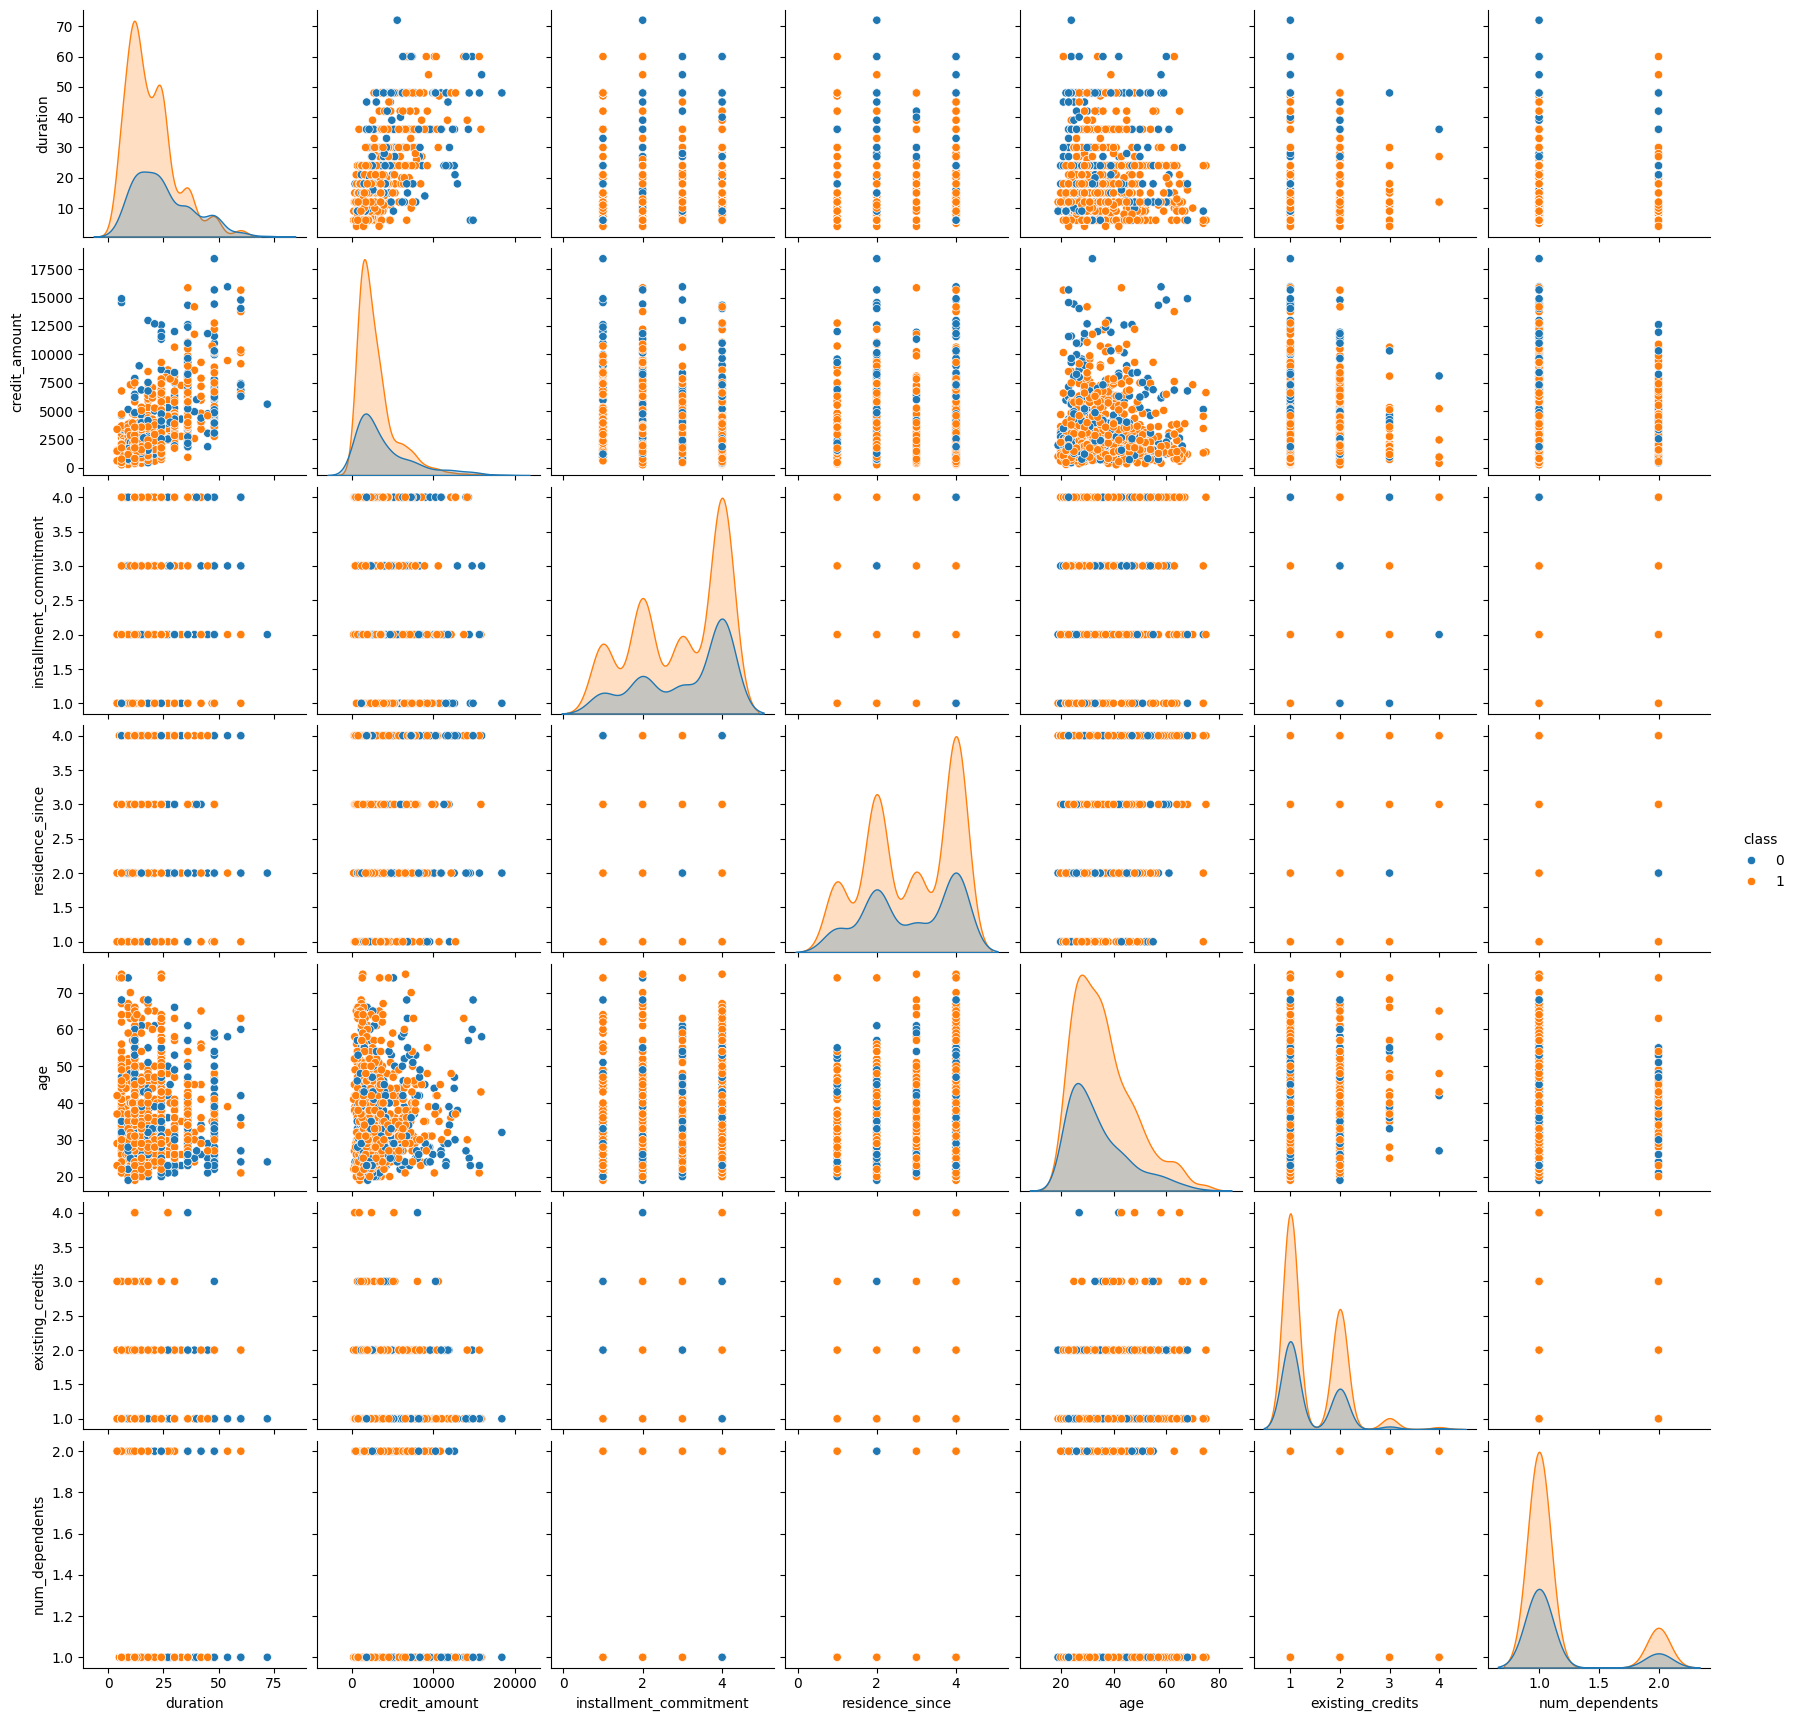

In [110]:
sns.pairplot(df, hue="class")

In [111]:
nominal = df[["credit_amount", "age", "existing_credits", "num_dependents"]]
categorical = df[["credit_history", "purpose", "housing", "job"]]

# nominal
categorical

,credit_history,purpose,housing,job
0,critical/other existing credit,radio/tv,own,skilled
1,existing paid,radio/tv,own,skilled
2,critical/other existing credit,education,own,unskilled resident
3,existing paid,furniture/equipment,for free,skilled
4,delayed previously,new car,for free,skilled
...,...,...,...,...
995,existing paid,furniture/equipment,own,unskilled resident
996,existing paid,used car,own,high qualif/self emp/mgmt
997,existing paid,radio/tv,own,skilled
998,existing paid,radio/tv,for free,skilled


# Preprocessing

Perform any needed preprocessing on the chosen features, including:
- Scaling
- Encoding
- Dealing with NaN values

Note: Use only the preprocessing steps you think are useful.

In [112]:
categorical = pd.get_dummies(categorical)

categorical

,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_new car,purpose_used car,purpose_business,purpose_education,...,purpose_radio/tv,purpose_repairs,purpose_retraining,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_unemp/unskilled non res,job_unskilled resident,job_skilled
0,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
996,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
997,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
998,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True


In [113]:
credit = pd.concat([nominal, categorical], axis=1)

credit

,credit_amount,age,existing_credits,num_dependents,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,...,purpose_radio/tv,purpose_repairs,purpose_retraining,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_unemp/unskilled non res,job_unskilled resident,job_skilled
0,1169,67,2,1,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1,5951,22,1,1,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2,2096,49,1,2,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,7882,45,1,2,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,4870,53,2,2,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1736,31,1,1,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
996,3857,40,1,1,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
997,804,38,1,1,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
998,1845,23,1,1,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,True


# Splitting the Data

Split your data as follows:

80% training set

10% validation set

10% test set

In [114]:
y = df["class"].values

x_columns = len(credit.columns)

x = credit.iloc[:, 0:x_columns].values


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(len(X_train), len(X_test), len(X_validate))

800 100 100


# Training Classifiers

Use the KNN-classifier model to train your data.

Choose the best k for the k-nearest neighbor (KNN) algorithm by trying different values and validating performance on the validation set.

Note: choosing the best k is an example of hyper-parameter tuning.

Classification Metrics

Print the accuracy score of your final classifier.

Print the confusion matrix.

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3).fit(X_train, y_train)
X_test
knn.score(X_test, y_test)

0.64

In [117]:
scores = []

neighbors = range(1,20)

for i in neighbors:
        knn = KNeighborsClassifier(n_neighbors= i).fit(X_train, y_train)
        results = knn.score(X_test, y_test)
        scores.append(results)

print(scores)

[0.59, 0.53, 0.64, 0.56, 0.68, 0.67, 0.66, 0.58, 0.65, 0.65, 0.65, 0.65, 0.69, 0.63, 0.67, 0.65, 0.66, 0.66, 0.67]


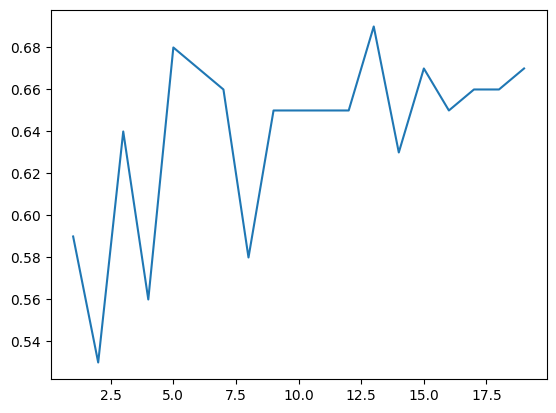

In [118]:
plt.plot(neighbors, scores)

In [119]:
knn = KNeighborsClassifier(n_neighbors= 13).fit(X_train, y_train)
result = knn.score(X_validate, y_validate)
print("Accoracy =", result)

Accoracy = 0.75


In [120]:
from sklearn.metrics import confusion_matrix

predictions = knn.predict(X_validate)

print("Confusion Matrix: \n", confusion_matrix(y_validate, predictions))

Confusion Matrix: 
 [[ 8 21]
 [ 4 67]]


# Challenge Yourself (Optional)
Choose another model (other than k-nearest neighbor (KNN)) and repeat step 6.

In [121]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
results = model.score(X_test, y_test)

print(results)

0.63
